In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# get the required dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [56]:
#cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def convert_job_skills(x):
    '''Convert string to list'''
    try:
        if pd.notna(x):
            return ast.literal_eval(x)
        else:
            return x
    except (ValueError, SyntaxError):
        return x

df['job_skills'] = df['job_skills'].apply(convert_job_skills)


To analyze the data job market in Pakistan effectively, we compare it with several other countries that are economically comparable, have similar demographic factors, and face related job market challenges.

### Selected Countries

The following countries are included in the comparison due to their economic development levels, demographic characteristics, and job market conditions similar to Pakistan:

- **India**: Comparable in terms of economic development and large population.
- **Bangladesh**: Similar economic conditions and demographic factors.
- **Philippines**: Comparable economic challenges and job market trends.
- **Nigeria**: Similar economic and demographic profile.
- **Egypt**: Comparable in economic development and youth demographics.

### Data Columns for Analysis

We will use the following columns for comparison:
- **`job_title_short`** and **`job_title`**
- **`salary_year_avg`** and **`salary_hour_avg`**
- **`job_skills`** and **`job_type_skills`**
- **`job_work_from_home`** and **`job_health_insurance`**

This approach will allow us to gain insights into how Pakistan's data job market compares with these countries in terms of job roles, salaries, skills, and benefits.


In [83]:
# Get the value counts for job_country and convert to DataFrame
df_country_counts = df['job_country'].value_counts().to_frame()

# Filter for the row corresponding to 'Pakistan'
jobs_in_pakistan = df_country_counts.loc['Pakistan']

print(jobs_in_pakistan)

count    2148
Name: Pakistan, dtype: int64


In [84]:
df = df[df["job_country"]=="Pakistan"]

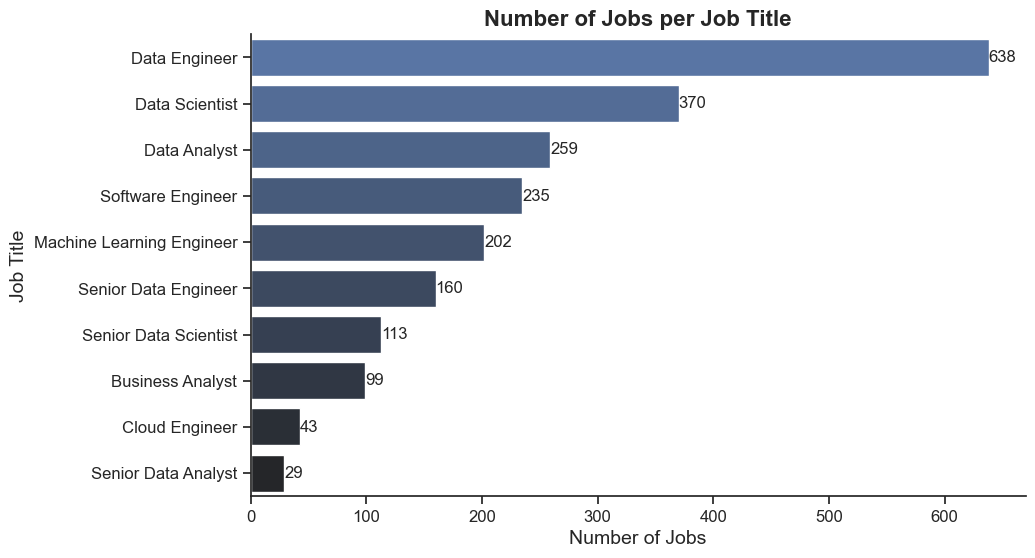

In [85]:
df_plot = df['job_title_short'].value_counts().to_frame().reset_index()
df_plot.columns = ['job_title_short', 'count']

# Set theme for consistency
sns.set_theme(style='ticks')

# Create figure and axes for a detailed and customized plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot with hue based on job titles
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='job_title_short', palette='dark:b_r', ax=ax, dodge=False, legend=False)

# Customize plot with titles, labels, and styles
ax.set_title('Number of Jobs per Job Title', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Jobs', fontsize=14)
ax.set_ylabel('Job Title', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax)

# Annotate each bar with the count value
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', fontsize=12)

# Show plot with customized settings
plt.show()

# Save the plot to a file for sharing or portfolio
fig.savefig('jobs_per_title.png', dpi=300, bbox_inches='tight',)

In [87]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')